##### Ejemplo con Dataset Penguin

* Librerías a utilizar

In [112]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [113]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [114]:
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


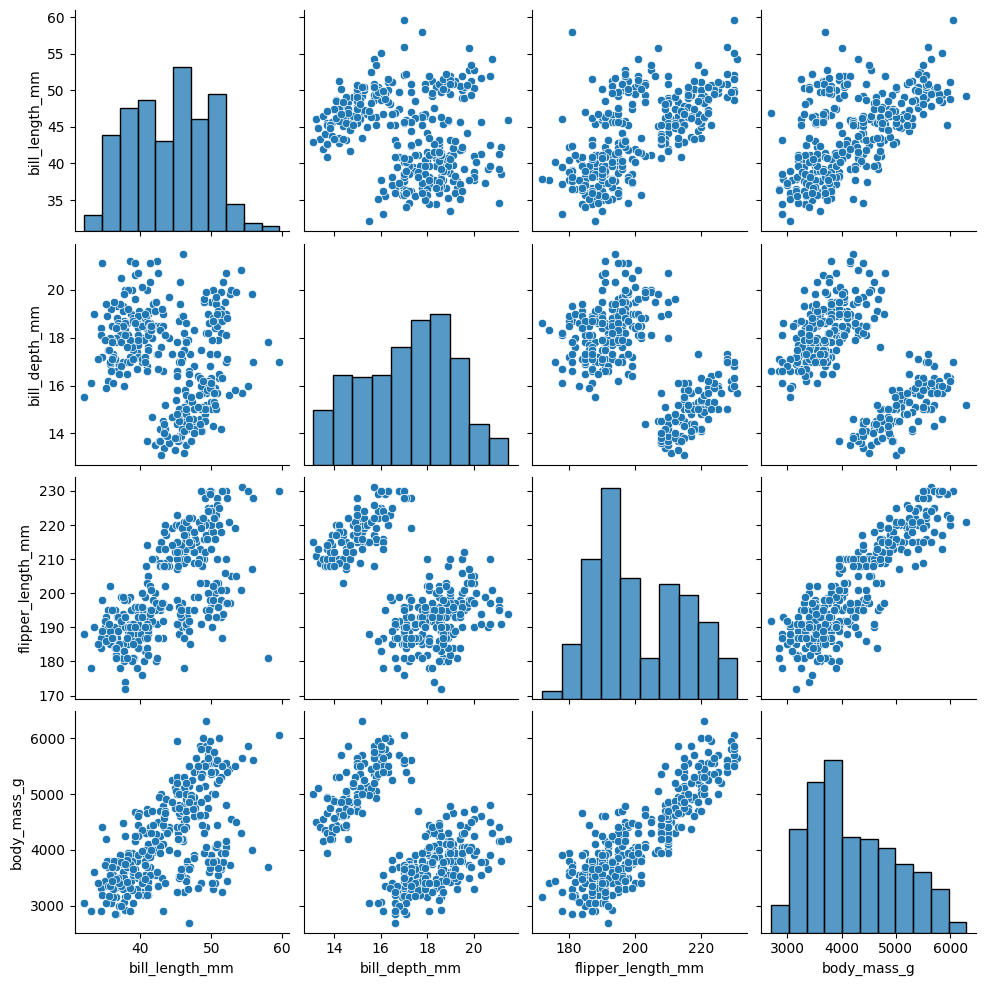

In [115]:
sns.pairplot(df);

In [116]:
# Separar X, y
from sklearn.metrics import mean_absolute_percentage_error


X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
y = df["body_mass_g"]

#DataFrame de resultados:
df_resultados = pd.DataFrame(columns=["Modelo", "R2", "MAE", "RMSE", "MAPE"])

# Regresión lineal múltiple
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # Error del 7,7% con respecto de valor real

df_resultados.loc[len(df_resultados)] = ["RLM 3col", r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183


In [117]:
# Encoding: con get_dummies (para valores categóricos)
# Heatmap corr
# RLM con todas las columnas

In [118]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True


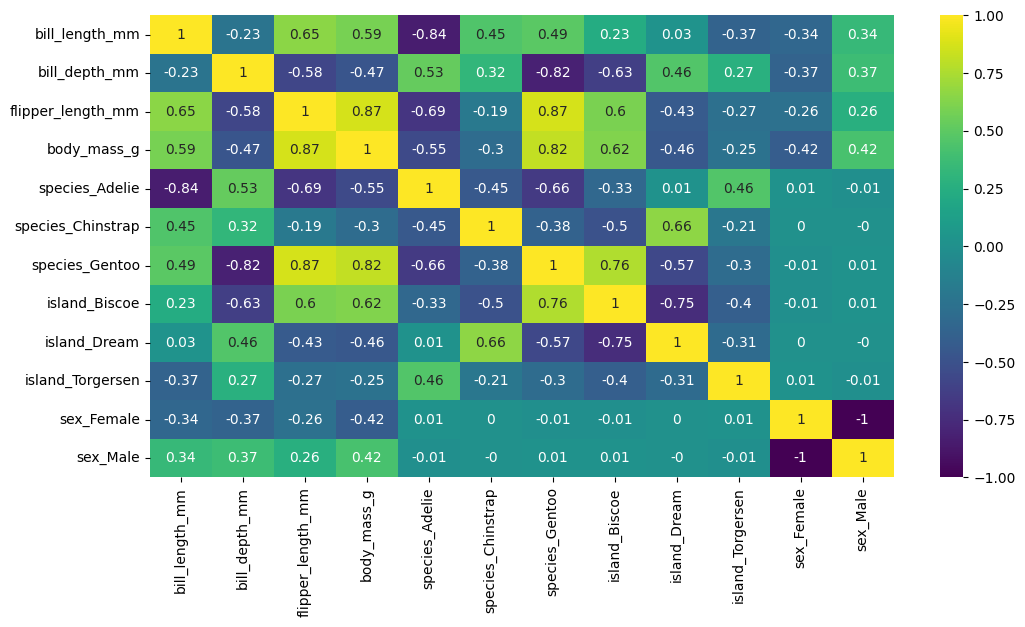

In [119]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr().round(2), annot=True, cmap="viridis");

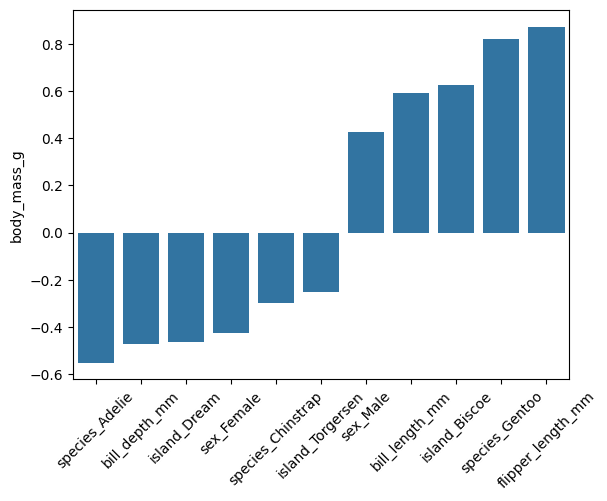

In [120]:
# correlación de cada columna con la columna peso (body_mass_g)
sns.barplot(df.corr()["body_mass_g"].drop("body_mass_g").sort_values())
plt.xticks(rotation=45);

In [121]:
X = df.drop("body_mass_g", axis=1)
y = df["body_mass_g"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # Error del 5,5% con respecto del valor real

df_resultados.loc[len(df_resultados)] = ["RLM 11col", r2, mae, rmse, mape]
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982


In [122]:
# RLM con drop first en get_dummies, borra una de las columnas de cada dummies generados
# Para  evitar correlación entre ellas, evitar multicolinealidad
# Observamos que da los mismos resultados que hacer un get_dummies normal
    # Lo que sugiere que es mejor hacerlo con drop_first porque con menor cantidad de columnas logramos los mismos resultados
    # Con menos columnas el modelo va a entrenar más ligero porque tiene que procesar menos datos
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) #Agregar drop_first=True

X = df.drop("body_mass_g", axis=1)
y = df["body_mass_g"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # Error del 5,5% con respecto del valor real

df_resultados.loc[len(df_resultados)] = ["RLM 8col", r2, mae, rmse, mape]
df_resultados # El resultado es igual que con 11 columnas

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982


In [123]:
# KNN - k Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True) 

X = df.drop("body_mass_g", axis=1)
y = df["body_mass_g"]

model = KNeighborsRegressor() # Por defecto n_neighbors es 5
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ["KNN k = 5", r2, mae, rmse, mape]
df_resultados 

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 5,0.876481,220.420420,282.569718,0.054214


In [124]:
# Bucle for para KNN para encontrar el mejor valor K

for K in range(2, 15):
    model = KNeighborsRegressor(n_neighbors=K) # El valor k cambia en cada iteracción
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"KNN K = {K}", r2, mae, rmse, mape]
    df_resultados 
    
df_resultados.sort_values("R2", ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
4,KNN K = 2,0.922721,172.409910,223.507101,0.042347
5,KNN K = 3,0.894704,204.179179,260.894981,0.050295
6,KNN K = 4,0.885988,211.524024,271.477923,0.051974
7,KNN K = 5,0.876481,220.420420,282.569718,0.054214
3,KNN k = 5,0.876481,220.420420,282.569718,0.054214
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
8,KNN K = 6,0.874647,223.961461,284.660507,0.055181
9,KNN K = 7,0.869713,227.670528,290.208117,0.056204
10,KNN K = 8,0.865178,231.719219,295.216096,0.056983


In [125]:
# Probar con escalado y volver a probar KNN
# KNN es sensible a la escala, debido al cálculo de distancias
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

for k in range(2, 15):
    model = KNeighborsRegressor(n_neighbors=2)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) # El error del 3.8% con respecto del valor real

    df_resultados.loc[len(df_resultados)] = [f"KNN scaled k = {k}", r2, mae, rmse, mape]
    df_resultados 

df_resultados.sort_values("R2", ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
24,KNN scaled k = 9,0.938673,157.057057,199.106488,0.038662
29,KNN scaled k = 14,0.938673,157.057057,199.106488,0.038662
25,KNN scaled k = 10,0.938673,157.057057,199.106488,0.038662
28,KNN scaled k = 13,0.938673,157.057057,199.106488,0.038662
27,KNN scaled k = 12,0.938673,157.057057,199.106488,0.038662
26,KNN scaled k = 11,0.938673,157.057057,199.106488,0.038662
22,KNN scaled k = 7,0.938673,157.057057,199.106488,0.038662
23,KNN scaled k = 8,0.938673,157.057057,199.106488,0.038662
20,KNN scaled k = 5,0.938673,157.057057,199.106488,0.038662
21,KNN scaled k = 6,0.938673,157.057057,199.106488,0.038662


KNN
Computacionalmente costoso, ya que es lazy o perezoso, realiza los cálculos en el predict
No existe un entrenamiento pesado como en los otros métodos, el modelo simplemente almacena los datos
En el entrenamiento, y para hacer una predicción (represión o clasificación) busca y calcula los k vecinos más cercano a cada punto (o instancia) que se quiere predecir

In [126]:
# Particionamiento para Regresión lineal múltiple 8 col
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Sin escalado:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

df_resultados.loc[len(df_resultados)] = ["RLM 8 col (test)", r2, mae, rmse, mape]
df_resultados.sort_values("R2", ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
24,KNN scaled k = 9,0.938673,157.057057,199.106488,0.038662
22,KNN scaled k = 7,0.938673,157.057057,199.106488,0.038662
29,KNN scaled k = 14,0.938673,157.057057,199.106488,0.038662
26,KNN scaled k = 11,0.938673,157.057057,199.106488,0.038662
25,KNN scaled k = 10,0.938673,157.057057,199.106488,0.038662
28,KNN scaled k = 13,0.938673,157.057057,199.106488,0.038662
27,KNN scaled k = 12,0.938673,157.057057,199.106488,0.038662
23,KNN scaled k = 8,0.938673,157.057057,199.106488,0.038662
20,KNN scaled k = 5,0.938673,157.057057,199.106488,0.038662
17,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662


In [127]:
# KNN K = 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

for k in range (2, 10):
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = ["KNN = 5 (test)", r2, mae, rmse, mape]
    df_resultados.sort_values("R2", ascending=False)

In [128]:
df_resultados

,Modelo,R2,MAE,RMSE,MAPE
0,RLM 3col,0.763937,310.062518,390.637086,0.077183
1,RLM 11col,0.875223,226.413652,284.005204,0.055982
2,RLM 8col,0.875223,226.413652,284.005204,0.055982
3,KNN k = 5,0.876481,220.420420,282.569718,0.054214
4,KNN K = 2,0.922721,172.409910,223.507101,0.042347
5,KNN K = 3,0.894704,204.179179,260.894981,0.050295
6,KNN K = 4,0.885988,211.524024,271.477923,0.051974
7,KNN K = 5,0.876481,220.420420,282.569718,0.054214
8,KNN K = 6,0.874647,223.961461,284.660507,0.055181
9,KNN K = 7,0.869713,227.670528,290.208117,0.056204


In [129]:
# Particionamiento con escalado para KNN: MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = MinMaxScaler()

# scaler.fit_transform(X, y)

# Introduce data leakage o fuga de datos
    # porque entrena el scaler con datos de test que usaar para escalar datos de train que enseña al modelo
    # por tanto el modelo está recibiendo datos escalados influenciados por datos de test
    #scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train) # fit_transform solo sobre entrenamiento
X_test_scaled = scaler.transform(X_test)

for k in range(2, 10):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"KNN = {K} (test)", r2, mae, rmse, mape]
    

In [130]:
df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]

C:\Users\carme\AppData\Local\Temp\ipykernel_716\703693653.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]
C:\Users\carme\AppData\Local\Temp\ipykernel_716\703693653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]


,Modelo,R2,MAE,RMSE,MAPE
46,KNN = 14 (test),0.879003,215.132670,276.081262,0.054252
40,KNN = 14 (test),0.875117,220.895522,280.480221,0.055299
43,KNN = 14 (test),0.874876,216.417910,280.750778,0.054469
45,KNN = 14 (test),0.874276,217.397388,281.422781,0.054830
30,RLM 8 col (test),0.873280,208.168496,271.558568,0.052835
42,KNN = 14 (test),0.871614,223.059701,284.386614,0.055861
44,KNN = 14 (test),0.868386,223.347548,287.939099,0.056255
41,KNN = 14 (test),0.866294,228.358209,290.218732,0.057319
34,KNN = 5 (test),0.849513,239.850746,307.892451,0.060586
38,KNN = 5 (test),0.849513,239.850746,307.892451,0.060586


In [131]:
# StandardScaler en regresión lineal múltiple
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

df_resultados.loc[len(df_resultados)] = ["RLM 8 col scaled (test)", r2, mae, rmse, mape]


In [132]:
df_resultados.sort_values("R2", ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
24,KNN scaled k = 9,0.938673,157.057057,199.106488,0.038662
23,KNN scaled k = 8,0.938673,157.057057,199.106488,0.038662
21,KNN scaled k = 6,0.938673,157.057057,199.106488,0.038662
29,KNN scaled k = 14,0.938673,157.057057,199.106488,0.038662
27,KNN scaled k = 12,0.938673,157.057057,199.106488,0.038662
26,KNN scaled k = 11,0.938673,157.057057,199.106488,0.038662
25,KNN scaled k = 10,0.938673,157.057057,199.106488,0.038662
28,KNN scaled k = 13,0.938673,157.057057,199.106488,0.038662
20,KNN scaled k = 5,0.938673,157.057057,199.106488,0.038662
19,KNN scaled k = 4,0.938673,157.057057,199.106488,0.038662


## CART Árbol de decisión para regresión

* Fácil interpretabilidad, scikit nos muestra el árbol resultante en texto e imagen
* No necesita el escalado
* No le afecta tanto los outliers
* Hace automáticamente los cortes umbrales para decidir los nodos
* Importante: ajustar la profundidad para evitar overfitting o sobreajuste
* Por sí solo puede ser débil, suele usarse ene combinación de muchos árboles creando así un Random Forest
* Sensible si hay pocos datos

In [133]:
# CART: árbol de decisión
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

# Sin particionamiento
# 2 a 10 niveles de profundidad

model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) 

df_resultados.loc[len(df_resultados)] = ["DTR depth 2 ", r2, mae, rmse, mape]
df_resultados.sort_values("R2", ascending=False)

,Modelo,R2,MAE,RMSE,MAPE
17,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
24,KNN scaled k = 9,0.938673,157.057057,199.106488,0.038662
23,KNN scaled k = 8,0.938673,157.057057,199.106488,0.038662
22,KNN scaled k = 7,0.938673,157.057057,199.106488,0.038662
29,KNN scaled k = 14,0.938673,157.057057,199.106488,0.038662
28,KNN scaled k = 13,0.938673,157.057057,199.106488,0.038662
27,KNN scaled k = 12,0.938673,157.057057,199.106488,0.038662
26,KNN scaled k = 11,0.938673,157.057057,199.106488,0.038662
25,KNN scaled k = 10,0.938673,157.057057,199.106488,0.038662
20,KNN scaled k = 5,0.938673,157.057057,199.106488,0.038662


In [134]:
# ver el árbol en  forma texto
print(export_text(model, feature_names=X.columns))

|--- species_Gentoo <= 0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [3419.16]
|   |--- sex_Male >  0.50
|   |   |--- value: [4010.28]
|--- species_Gentoo >  0.50
|   |--- sex_Male <= 0.50
|   |   |--- value: [4679.74]
|   |--- sex_Male >  0.50
|   |   |--- value: [5484.84]



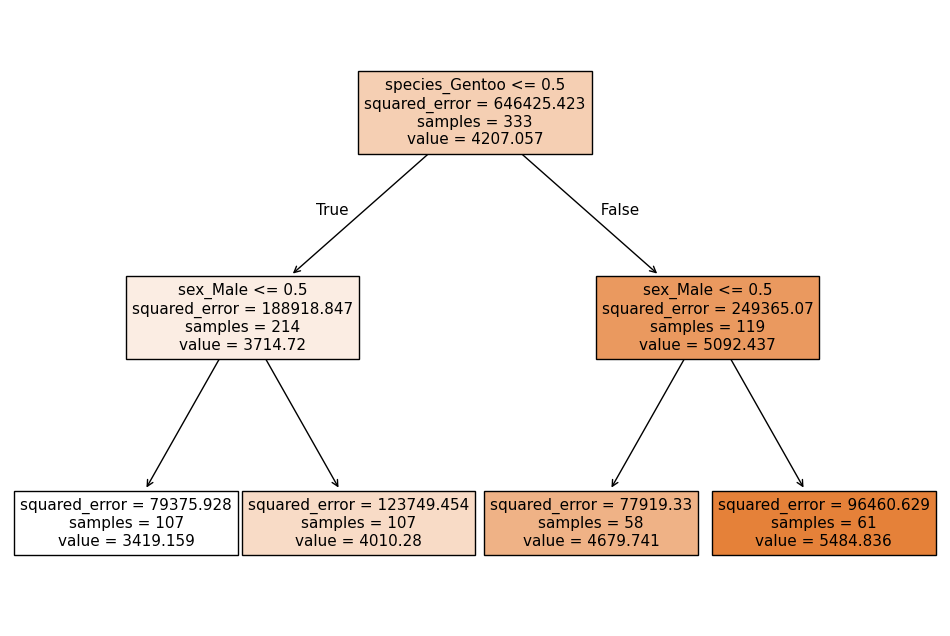

In [135]:
# Ver el árbol en forma gráfico
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True);

In [136]:
# sin particionamiento con bucle for
for depth in range (2, 10):
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(X, y)

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"DTR depth 2 {depth}", r2, mae, rmse, mape]
    df_resultados

df_resultados.sort_values("R2", ascending=False).head(25)

,Modelo,R2,MAE,RMSE,MAPE
24,KNN scaled k = 9,0.938673,157.057057,199.106488,0.038662
17,KNN scaled k = 2,0.938673,157.057057,199.106488,0.038662
18,KNN scaled k = 3,0.938673,157.057057,199.106488,0.038662
19,KNN scaled k = 4,0.938673,157.057057,199.106488,0.038662
20,KNN scaled k = 5,0.938673,157.057057,199.106488,0.038662
21,KNN scaled k = 6,0.938673,157.057057,199.106488,0.038662
22,KNN scaled k = 7,0.938673,157.057057,199.106488,0.038662
23,KNN scaled k = 8,0.938673,157.057057,199.106488,0.038662
25,KNN scaled k = 10,0.938673,157.057057,199.106488,0.038662
28,KNN scaled k = 13,0.938673,157.057057,199.106488,0.038662


In [137]:
# CART con particionamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
for depth in range (2, 10):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"DTR depth 2 {depth} (test)", r2, mae, rmse, mape]
    

In [138]:
# df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("DTR")]
df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]

C:\Users\carme\AppData\Local\Temp\ipykernel_716\167556418.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]
C:\Users\carme\AppData\Local\Temp\ipykernel_716\167556418.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]


,Modelo,R2,MAE,RMSE,MAPE
46,KNN = 14 (test),0.879003,215.132670,276.081262,0.054252
40,KNN = 14 (test),0.875117,220.895522,280.480221,0.055299
43,KNN = 14 (test),0.874876,216.417910,280.750778,0.054469
45,KNN = 14 (test),0.874276,217.397388,281.422781,0.054830
30,RLM 8 col (test),0.873280,208.168496,271.558568,0.052835
47,RLM 8 col scaled (test),0.873280,208.168496,271.558568,0.052835
42,KNN = 14 (test),0.871614,223.059701,284.386614,0.055861
44,KNN = 14 (test),0.868386,223.347548,287.939099,0.056255
41,KNN = 14 (test),0.866294,228.358209,290.218732,0.057319
59,DTR depth 2 4 (test),0.855594,235.410867,289.890960,0.060773


In [139]:
# Random Forest (Con particionamiento)(test)
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
for depth in range(2, 15):
    model = RandomForestRegressor(n_estimators=200, max_depth=depth) # n_estimators por defecto es 100 árboles
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"RF depth 2 {depth}", r2, mae, rmse, mape]

In [140]:
df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]

C:\Users\carme\AppData\Local\Temp\ipykernel_716\703693653.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]
C:\Users\carme\AppData\Local\Temp\ipykernel_716\703693653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("(test)")]


,Modelo,R2,MAE,RMSE,MAPE
46,KNN = 14 (test),0.879003,215.132670,276.081262,0.054252
40,KNN = 14 (test),0.875117,220.895522,280.480221,0.055299
43,KNN = 14 (test),0.874876,216.417910,280.750778,0.054469
45,KNN = 14 (test),0.874276,217.397388,281.422781,0.054830
30,RLM 8 col (test),0.873280,208.168496,271.558568,0.052835
47,RLM 8 col scaled (test),0.873280,208.168496,271.558568,0.052835
42,KNN = 14 (test),0.871614,223.059701,284.386614,0.055861
44,KNN = 14 (test),0.868386,223.347548,287.939099,0.056255
41,KNN = 14 (test),0.866294,228.358209,290.218732,0.057319
59,DTR depth 2 4 (test),0.855594,235.410867,289.890960,0.060773


# SVM - Support Vector Machines

* SVR Regresión: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
* SVC Clasificación
    * https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
    * https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

* Mapea los datos a un espacio de más dimensiones donde sí pueden separarse con un hiperplano
    * Kernel lineal
    * Kernel polinómico (parámetro degree para ajustar el grado)
    * Kernel rbf (por defecto)

Encontrar línea un hiperplano que separe los puntos de la manera más clara posible. Cuanto mayor sea ese margen separando los grupos de puntas va a generalizar mejor, es decir, va a tener menor sobreajuste overfitting.

* C: controla cuánto penalizamos por salirse del margen o banda
    * 0.01, 0.1, 1, 10
    * Grado de penalización por error
    * Cuanto más bajo, tolera más errores, prioriza una banda más ancha

* epsilon: grosor de la banda o margen de no penalización, si es grande hay más tolerancia, permite que los puntos se alejen
    * cuanto más grande es el epsilon, más ancho es el tubo, mayor tolerancia al error
    * por defecto: 0.1

* kernel: lineal, polinómico, rbf

In [141]:
from sklearn.svm import SVC, SVR

c_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

for c in c_values:
    model = SVR(C=c) # eplison si es cercano a 0 no habrá margen para error y producee overfitting
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) 

    df_resultados.loc[len(df_resultados)] = [f"SVR C {c} (test)", r2, mae, rmse, mape]

In [142]:
df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("SVR")]

C:\Users\carme\AppData\Local\Temp\ipykernel_716\83314015.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_resultados.sort_values("R2", ascending=False)[df_resultados["Modelo"].str.contains("SVR")]


,Modelo,R2,MAE,RMSE,MAPE
86,SVR C 1000 (test),0.787949,285.292427,351.286827,0.073733
85,SVR C 100 (test),0.432458,475.239421,574.698808,0.117765
84,SVR C 10 (test),0.054873,601.465718,741.628570,0.146041
83,SVR C 5 (test),0.025740,610.232859,752.971979,0.148138
82,SVR C 1 (test),0.002026,617.246572,762.080713,0.149816
81,SVR C 0.5 (test),-0.000964,618.123286,763.221370,0.150026
80,SVR C 0.1 (test),-0.003347,618.836440,764.129600,0.150199
79,SVR C 0.01 (test),-0.003883,619.001384,764.333545,0.150240
78,SVR C 0.001 (test),-0.003937,619.018138,764.353940,0.150244
